In [441]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [486]:
data = pd.read_csv("house.csv",encoding = 'latin1')

In [487]:
print(data.head())

      City      Price                  Address  Number_Beds  Number_Baths  \
0  Toronto   779900.0    #318 -20 SOUTHPORT ST            3             2   
1  Toronto   799999.0    #818 -60 SOUTHPORT ST            3             1   
2  Toronto   799900.0  #714 -859 THE QUEENSWAY            2             2   
3  Toronto  1200000.0         275 MORTIMER AVE            4             2   
4  Toronto   668800.0    #420 -388 RICHMOND ST            1             1   

  Province  Population  Latitude  Longitude  Median_Family_Income  
0  Ontario     5647656   43.7417   -79.3733               97000.0  
1  Ontario     5647656   43.7417   -79.3733               97000.0  
2  Ontario     5647656   43.7417   -79.3733               97000.0  
3  Ontario     5647656   43.7417   -79.3733               97000.0  
4  Ontario     5647656   43.7417   -79.3733               97000.0  


In [488]:
df_bc = data
df_bc

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


In [489]:
# Just to check if any null values exist in the data
df_bc.isnull().sum()

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

In [490]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [491]:
df_bc.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.576800e+04,35768.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000
mean,9.432963e+05,3.283661,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416
std,1.020110e+06,1.730654,1.371910,1.120016e+06,3.333855,22.280935,12132.353510
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.599000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000
50%,6.990000e+05,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000
75%,1.095000e+06,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


In [492]:
from sklearn.preprocessing import LabelEncoder

features = ['City', 'Number_Beds', 'Number_Baths', 'Population', 'Latitude', 'Longitude']
X = df_bc[features]
y = df_bc['Price']

label_encoder = LabelEncoder()

X['City_encoded'] = label_encoder.fit_transform(X['City'])

# Print the mapping of city to encoded labels
print("City to label mapping:")
for original, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original}: {str(encoded).zfill(2)}")

# Dropping 'City' column as we have the encoded version
X = X.drop('City', axis=1)

print(X.head())


City to label mapping:
Abbotsford: 00
Airdrie: 01
Barrie: 02
Brantford: 03
Burnaby: 04
Caledon: 05
Calgary: 06
Edmonton: 07
Guelph: 08
Halifax: 09
Hamilton: 10
Kamloops: 11
Kelowna: 12
Kingston: 13
Kitchener: 14
Lethbridge: 15
London: 16
Maple Ridge: 17
Medicine Hat: 18
Moncton: 19
Montreal: 20
Nanaimo: 21
New Westminster: 22
Oshawa: 23
Ottawa: 24
Peterborough: 25
Prince George: 26
Quebec: 27
Red Deer: 28
Regina: 29
Saint John: 30
Saskatoon: 31
Sault Ste. Marie: 32
Sherbrooke: 33
St. Catharines: 34
St. John's: 35
Sudbury: 36
Thunder Bay: 37
Toronto: 38
Trois-Rivieres: 39
Vancouver: 40
Victoria: 41
White Rock: 42
Windsor: 43
Winnipeg: 44
   Number_Beds  Number_Baths  Population  Latitude  Longitude  City_encoded
0            3             2     5647656   43.7417   -79.3733            38
1            3             1     5647656   43.7417   -79.3733            38
2            2             2     5647656   43.7417   -79.3733            38
3            4             2     5647656   43.7417 

C:\Users\visha\AppData\Local\Temp\ipykernel_35444\4037855778.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['City_encoded'] = label_encoder.fit_transform(X['City'])


In [493]:
# Reset index to align the rows before splitting
df = df_bc.reset_index(drop=True)
X = X.reset_index(drop=True)
y = df_bc['Price'].reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train

22048      439900.0
2795       599900.0
13468     1150000.0
18741     1100000.0
17539      599900.0
            ...    
14689      749999.0
1969      6980000.0
12597      759900.0
26478    17890000.0
1613      1348000.0
Name: Price, Length: 28614, dtype: float64

In [494]:
train_data = X_train.join(y_train)

In [495]:
train_data

,Number_Beds,Number_Baths,Population,Latitude,Longitude,City_encoded,Price
22048,3,4,119785,46.1328,-64.7714,19,439900.0
2795,3,3,1306784,51.0500,-114.0667,6,599900.0
13468,4,5,363222,48.4283,-123.3647,41,1150000.0
18741,4,3,181380,49.8881,-119.4956,12,1100000.0
17539,4,3,185565,47.4817,-52.7971,35,599900.0
...,...,...,...,...,...,...,...
14689,4,3,306519,42.2833,-83.0000,43,749999.0
1969,7,7,2426160,49.2500,-123.1000,40,6980000.0
12597,4,2,335949,43.9000,-78.8500,23,759900.0
26478,2,1,109167,49.0250,-122.8028,42,17890000.0


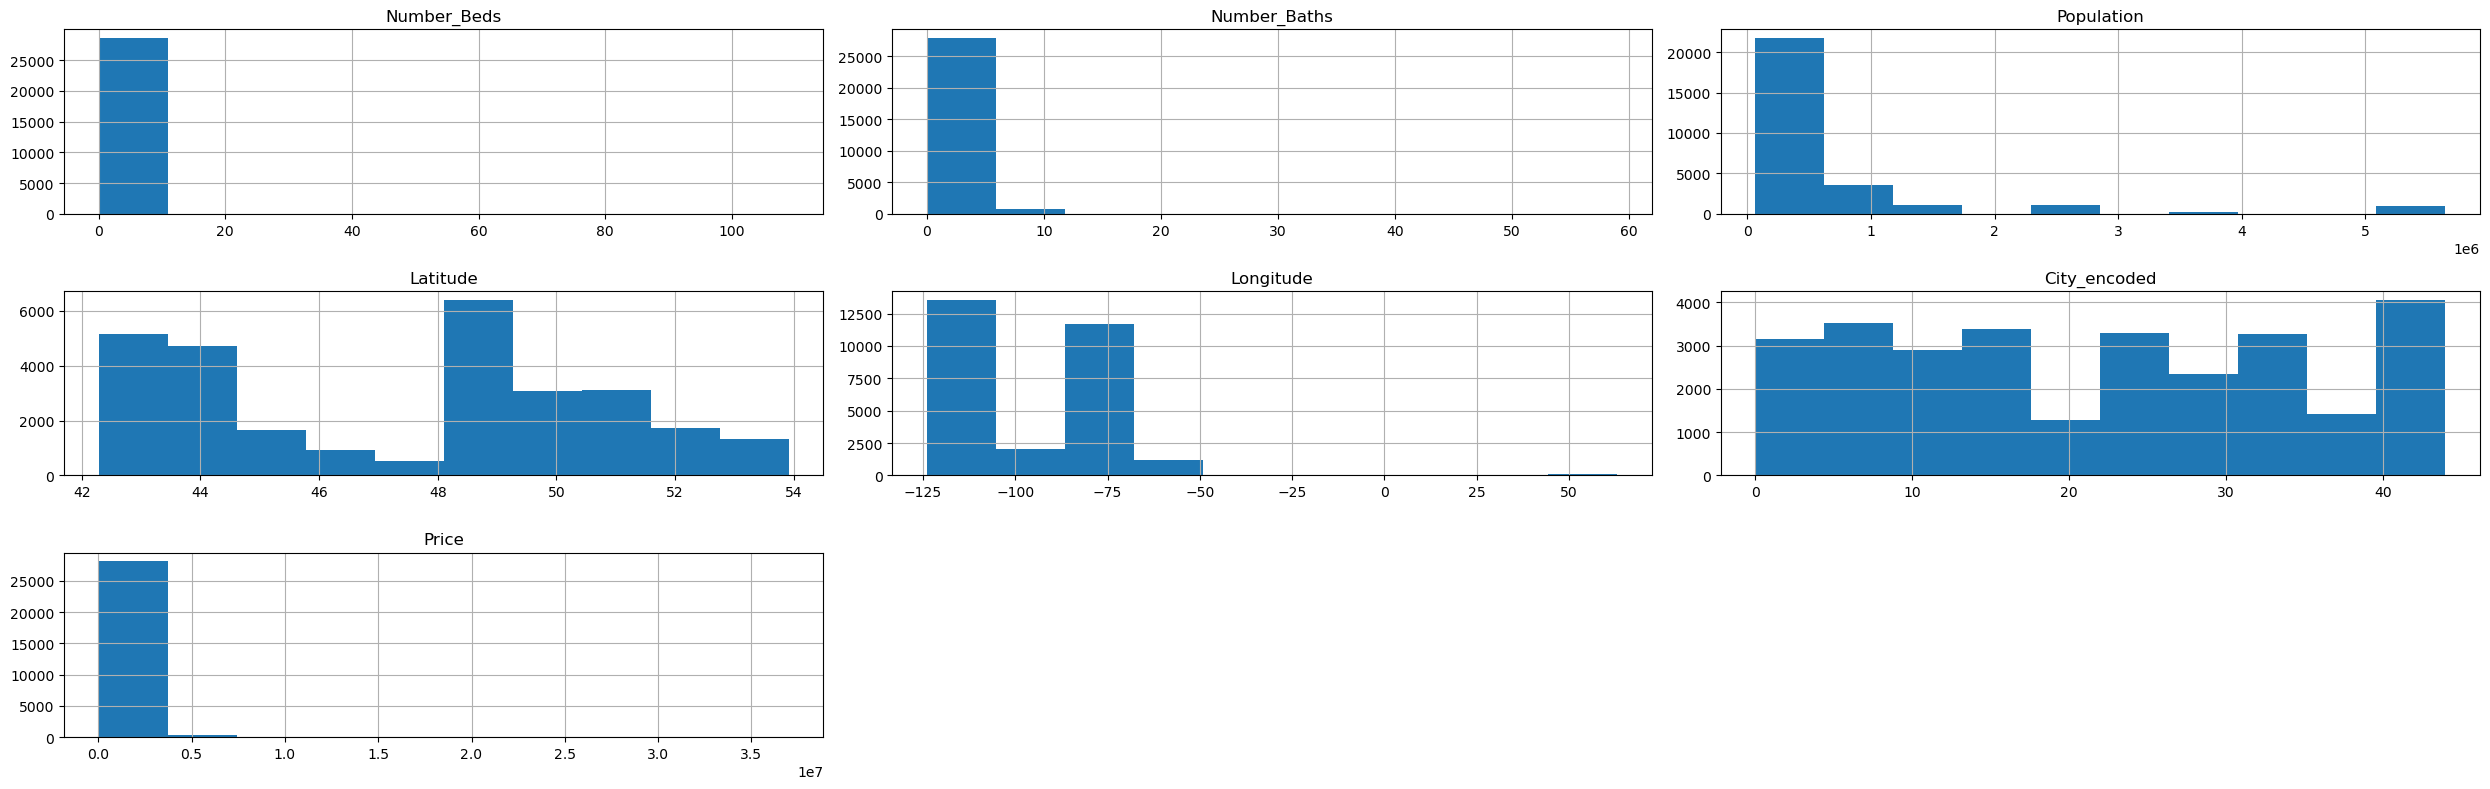

In [496]:
train_data.hist(figsize=(25,8))
plt.tight_layout()


In [497]:
train_data.corr()

,Number_Beds,Number_Baths,Population,Latitude,Longitude,City_encoded,Price
Number_Beds,1.000000,0.734672,-0.091082,-0.071295,0.054596,-0.053381,0.327601
Number_Baths,0.734672,1.000000,-0.079513,-0.024957,-0.032443,-0.074369,0.468634
Population,-0.091082,-0.079513,1.000000,-0.124179,0.104490,0.255121,0.072308
Latitude,-0.071295,-0.024957,-0.124179,1.000000,-0.727456,0.025971,-0.065320
Longitude,0.054596,-0.032443,0.104490,-0.727456,1.000000,-0.005326,-0.136094
City_encoded,-0.053381,-0.074369,0.255121,0.025971,-0.005326,1.000000,0.027464
Price,0.327601,0.468634,0.072308,-0.065320,-0.136094,0.027464,1.000000


<Axes: >

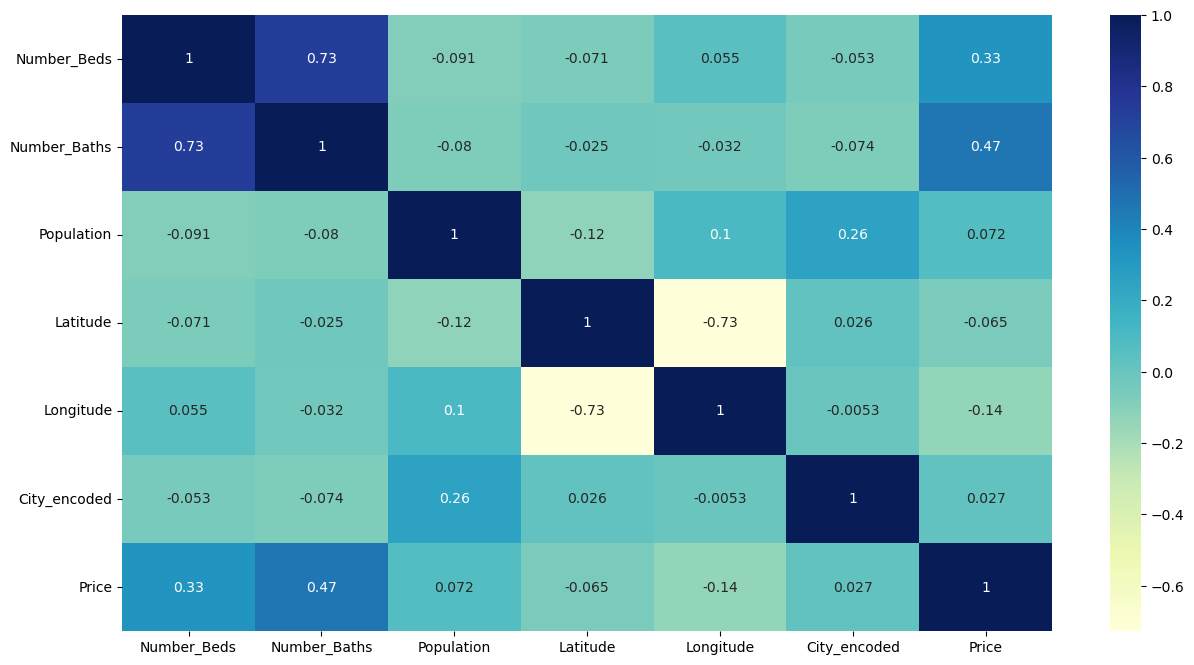

In [498]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [499]:
train_data['Number_Beds'] = np.log(train_data['Number_Beds'] + 1)
train_data['Number_Baths'] = np.log(train_data['Number_Baths'] + 1)
train_data['Population'] = np.log(train_data['Population'] + 1)
train_data['City_encoded'] = np.log(train_data['City_encoded'] + 1)

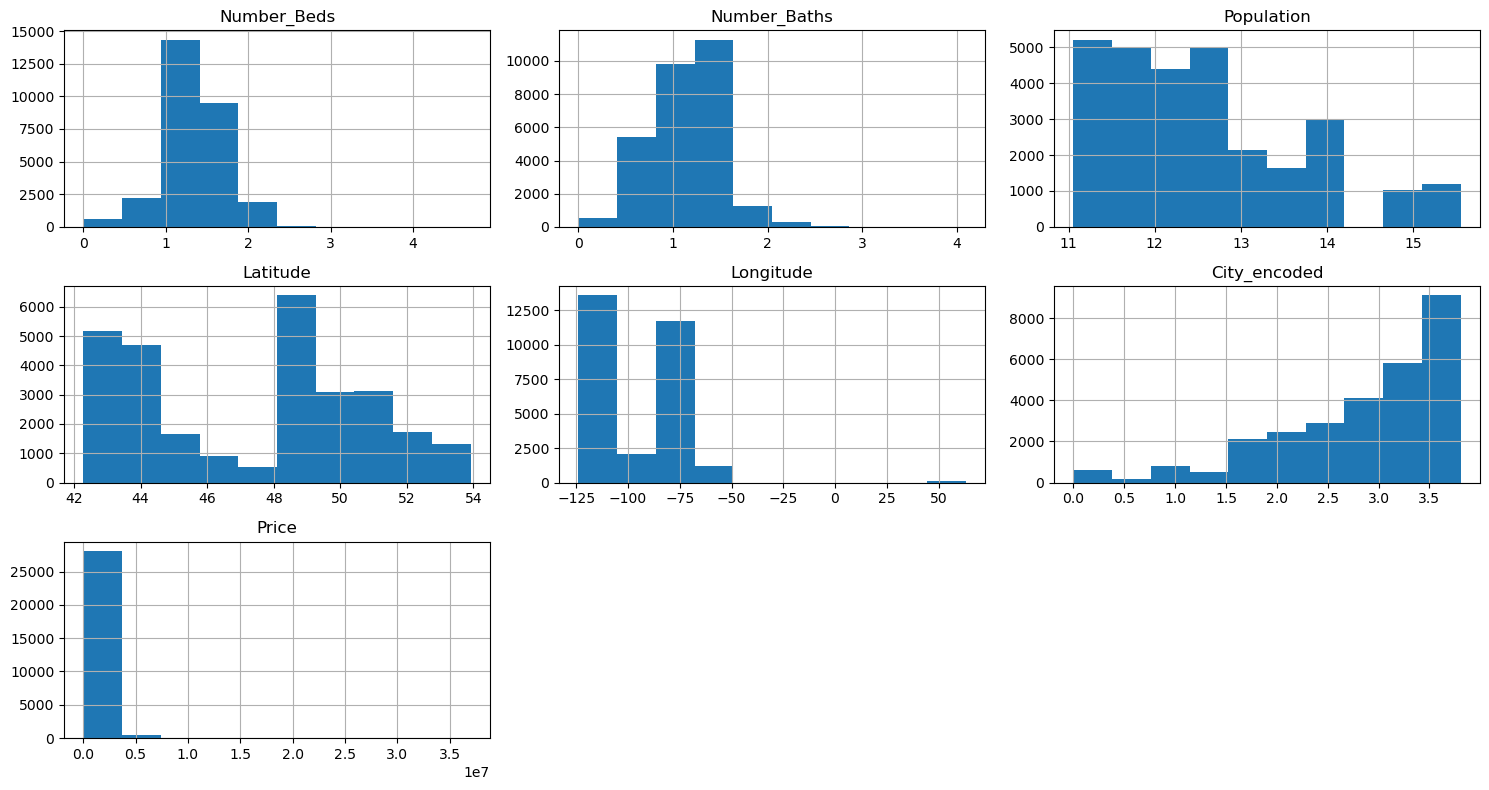

In [500]:
train_data.hist(figsize=(15,8))
plt.tight_layout()

In [501]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Split the data into training and testing sets
df_bc = df_bc.reset_index(drop=True)
X = X.reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_s = scaler.fit_transform(X_train)

# Initialize the Linear Regression model
reg = LinearRegression()

# Fit the model on the training data
reg.fit(X_train_s, y_train)


LinearRegression()

In [502]:
test_data = X_test.join(y_test)

test_data['Number_Beds'] = np.log(train_data['Number_Beds'] + 1)
test_data['Number_Baths'] = np.log(train_data['Number_Baths'] + 1)
test_data['Population'] = np.log(train_data['Population'] + 1)

In [503]:
test_data

,Number_Beds,Number_Baths,Population,Latitude,Longitude,City_encoded,Price
26849,NaN,NaN,NaN,49.2167,-122.6000,17,2199000.0
1227,0.869742,0.741276,2.806190,43.7417,-79.3733,38,929000.0
25467,0.959135,0.959135,2.533748,49.0250,-122.8028,42,2299800.0
27310,0.959135,0.869742,2.519189,49.2167,-122.6000,17,2139800.0
27560,0.526589,0.526589,2.519189,49.2167,-122.6000,17,494900.0
...,...,...,...,...,...,...,...
26076,1.124748,1.162283,2.533748,49.0250,-122.8028,42,4668000.0
3745,0.526589,0.526589,2.713574,51.0500,-114.0667,6,195000.0
29982,0.869742,0.526589,2.497721,45.2806,-66.0761,30,284000.0
26151,1.026672,0.869742,2.533748,49.0250,-122.8028,42,1699000.0


In [504]:
X_test_s = scaler.transform(X_test)

In [505]:
reg.score(X_test_s, y_test)

0.2845617523308124

In [506]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)
forest.score(X_test_s, y_test)

0.43646487867879247

In [507]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
param_grid = {
    "n_estimators": [10, 20, 30],
    "max_features": [2, 4, 6, 4],
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 4],
                         'n_estimators': [10, 20, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [508]:
best_forest = grid_search.best_estimator_

In [509]:
best_forest.score(X_test_s, y_test)

0.4344081566134069

In [531]:

new_data = {
    'City': 'Toronto',
    'Number_Beds': 1,
    'Number_Baths': 1,
    'Population': 50000,
    'Latitude': 49.25,
    'Longitude': -123.1
}

new_data_df = pd.DataFrame([new_data])

new_data_df['City_encoded'] = label_encoder.transform(new_data_df[['City']])
new_data_df.drop('City', axis=1, inplace=True)

new_data_df = new_data_df[X.columns]


prediction = best_forest.predict(new_data_df)

print(f"The predicted price is: {prediction[0]}")


The predicted price is: 2003943.7383950872


c:\Users\visha\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\visha\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
